# **Time Series Prediction on Bitcoin and Twitter Sentiments**



## Using bitcoin historical data and twitter sentiment data to predict prices.



In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('bitcoin.csv')


In [ ]:
df.columns

Index(['cryptoName', 'date', 'open', 'close', 'high', 'low', 'average',
       'volume', 'trade_count', 'vwap', 'timestamp'],
      dtype='object')

In [ ]:
print(f"Bitcoin data has {df.shape[0]} rows and {df.shape[1]} columns.")
print(f"The date range of data available is from {df.loc[:,'date'][0]} to {df.loc[:,'date'][len(df) - 1]}")
df.head()

Bitcoin data has 704 rows and 11 columns.
The date range of data available is from 02/05/2021 to 01/09/2023


,cryptoName,date,open,close,high,low,average,volume,trade_count,vwap,timestamp
0,BTC/USD,02/05/2021,37102.75,39051.00,39699.95,37070.01,38384.980,1153.670297,55838.0,38439.087793,2021-02-05 06:00:00+00:00
1,BTC/USD,02/06/2021,39054.20,38571.85,41019.93,38000.00,39509.965,1238.672877,63997.0,39759.608536,2021-02-06 06:00:00+00:00
2,BTC/USD,02/07/2021,38565.36,38700.00,39736.17,37383.51,38559.840,932.225474,46244.0,38455.814609,2021-02-07 06:00:00+00:00
3,BTC/USD,02/08/2021,38712.80,46964.37,47500.00,38658.96,43079.480,2876.161989,91292.0,44010.764310,2021-02-08 06:00:00+00:00
4,BTC/USD,02/09/2021,46957.60,46166.35,48203.13,45040.00,46621.565,1420.610386,59671.0,46688.885698,2021-02-09 06:00:00+00:00


In [ ]:
# Create a new dataframe with monthly dates as the index
date_range = pd.date_range(start='02/05/2021', end='01/09/2023', freq='D')
df['daily'] = date_range
df.drop('date', axis=1, inplace=True)
df = df.set_index('daily')
df.head()

,cryptoName,open,close,high,low,average,volume,trade_count,vwap,timestamp
daily,,,,,,,,,,
2021-02-05,BTC/USD,37102.75,39051.00,39699.95,37070.01,38384.980,1153.670297,55838.0,38439.087793,2021-02-05 06:00:00+00:00
2021-02-06,BTC/USD,39054.20,38571.85,41019.93,38000.00,39509.965,1238.672877,63997.0,39759.608536,2021-02-06 06:00:00+00:00
2021-02-07,BTC/USD,38565.36,38700.00,39736.17,37383.51,38559.840,932.225474,46244.0,38455.814609,2021-02-07 06:00:00+00:00
2021-02-08,BTC/USD,38712.80,46964.37,47500.00,38658.96,43079.480,2876.161989,91292.0,44010.764310,2021-02-08 06:00:00+00:00
2021-02-09,BTC/USD,46957.60,46166.35,48203.13,45040.00,46621.565,1420.610386,59671.0,46688.885698,2021-02-09 06:00:00+00:00


<Figure size 2000x800 with 0 Axes>

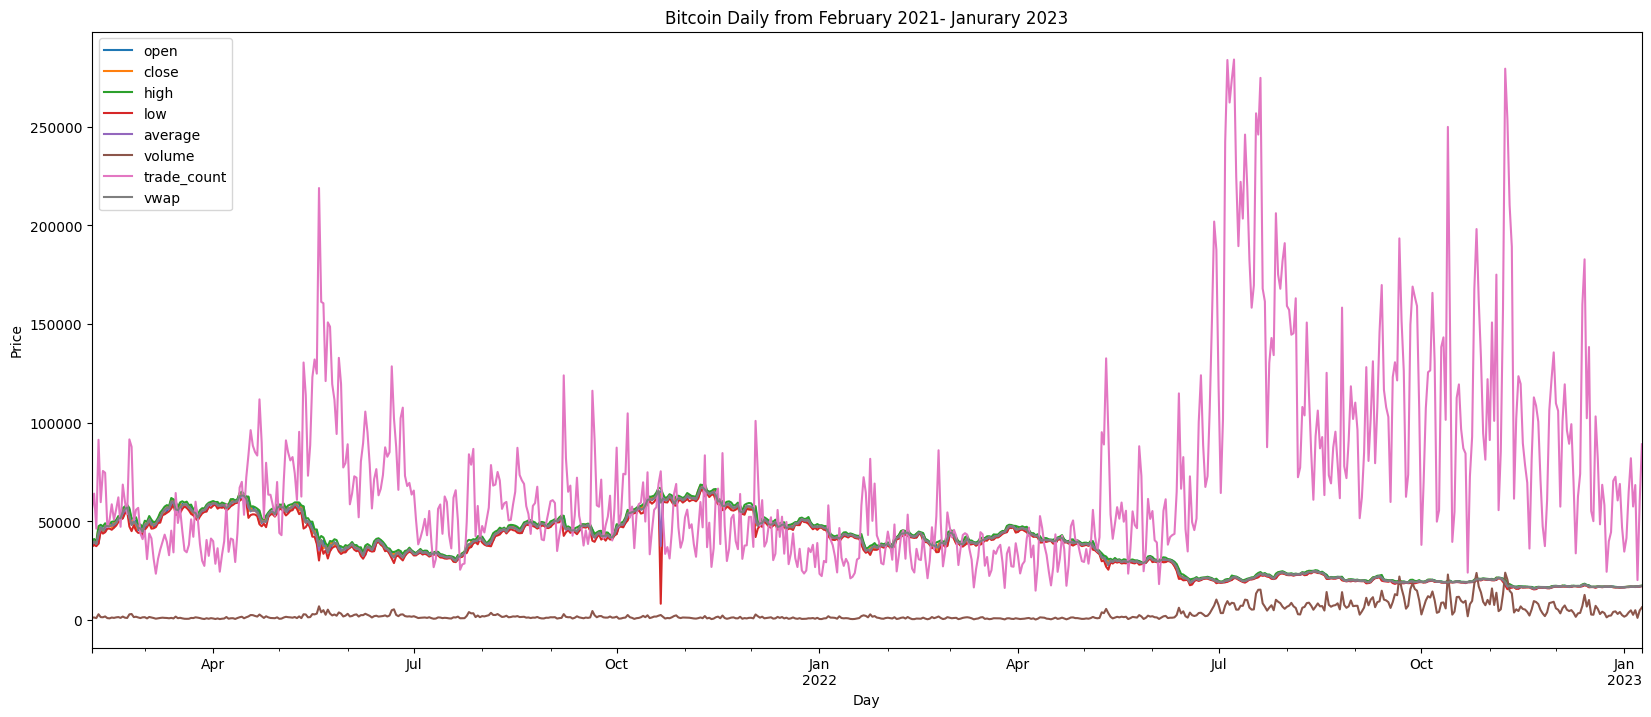

In [ ]:
# Plot Bitcoin prices over time
plt.figure(figsize=(20,8))
df.plot(figsize=(20,8))
plt.title('Bitcoin Daily from February 2021- Janurary 2023')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

In [ ]:
# Show summary statistics of the Bitcoin prices
print("Summary statistics of bitcoin prices:\n", df.describe())

Summary statistics of bitcoin prices:
                open         close          high           low       average  \
count    704.000000    704.000000    704.000000    704.000000    704.000000   
mean   37664.597599  37635.792628  38701.575682  36448.809645  37575.192663   
std    14256.422407  14277.162569  14674.841032  13795.428769  14178.458548   
min    15782.190000  15781.170000  16257.900000   8200.000000  15863.240000   
25%    21848.952500  21679.632500  22724.420000  21121.292500  21768.563750   
50%    39045.950000  39048.055000  40298.890000  38007.195000  39045.137500   
75%    48203.712500  48206.792500  49555.590000  46723.395000  48153.557500   
max    68144.050000  68145.330000  69025.050000  66251.040000  67264.965000   

             volume    trade_count          vwap  
count    704.000000     704.000000    704.000000  
mean    3208.083098   71684.515625  37636.509522  
std     3788.547612   47235.245617  14235.167913  
min      208.513808   14843.000000  15905.594

In [ ]:
# Show summary statistics of the Bitcoin prices
print("Summary statistics of BTC prices:\n", df.describe())

Summary statistics of BTC prices:
                open         close          high           low       average  \
count    704.000000    704.000000    704.000000    704.000000    704.000000   
mean   37664.597599  37635.792628  38701.575682  36448.809645  37575.192663   
std    14256.422407  14277.162569  14674.841032  13795.428769  14178.458548   
min    15782.190000  15781.170000  16257.900000   8200.000000  15863.240000   
25%    21848.952500  21679.632500  22724.420000  21121.292500  21768.563750   
50%    39045.950000  39048.055000  40298.890000  38007.195000  39045.137500   
75%    48203.712500  48206.792500  49555.590000  46723.395000  48153.557500   
max    68144.050000  68145.330000  69025.050000  66251.040000  67264.965000   

             volume    trade_count          vwap  
count    704.000000     704.000000    704.000000  
mean    3208.083098   71684.515625  37636.509522  
std     3788.547612   47235.245617  14235.167913  
min      208.513808   14843.000000  15905.594993 

In [ ]:
df

,cryptoName,open,close,high,low,average,volume,trade_count,vwap,timestamp
daily,,,,,,,,,,
2021-02-05,BTC/USD,37102.75,39051.00,39699.95,37070.01,38384.980,1153.670297,55838.0,38439.087793,2021-02-05 06:00:00+00:00
2021-02-06,BTC/USD,39054.20,38571.85,41019.93,38000.00,39509.965,1238.672877,63997.0,39759.608536,2021-02-06 06:00:00+00:00
2021-02-07,BTC/USD,38565.36,38700.00,39736.17,37383.51,38559.840,932.225474,46244.0,38455.814609,2021-02-07 06:00:00+00:00
2021-02-08,BTC/USD,38712.80,46964.37,47500.00,38658.96,43079.480,2876.161989,91292.0,44010.764310,2021-02-08 06:00:00+00:00
2021-02-09,BTC/USD,46957.60,46166.35,48203.13,45040.00,46621.565,1420.610386,59671.0,46688.885698,2021-02-09 06:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...
2023-01-05,BTC/USD,16838.47,16803.47,16873.28,16755.45,16814.365,2580.410943,57481.0,16822.708137,2023-01-05 06:00:00+00:00
2023-01-06,BTC/USD,16803.36,16926.62,17022.87,16675.00,16848.935,4927.378570,68356.0,16847.149630,2023-01-06 06:00:00+00:00
2023-01-07,BTC/USD,16926.60,16936.00,16949.00,16900.90,16924.950,1044.522620,20189.0,16925.486121,2023-01-07 06:00:00+00:00


In [ ]:
# Split the dataset into training and testing sets based on a cutoff year
train = df[df.index.day >= 2021/4/20]
test = df[df.index.day < 2021/4/20]


# Check the shape of the training and testing sets
print("Training set shape:", train.shape)
print("Testing set shape:", test.shape)

# Checking for bias in the split
train_pct = len(train) / len(df) * 100
test_pct = len(test) / len(df) * 100
print("Percentage of data in training set:", round(train_pct, 2), '%')
print("Percentage of data in testing set:", round(test_pct, 2), '%')


Training set shape: (124, 10)
Testing set shape: (580, 10)
Percentage of data in training set: 17.61 %
Percentage of data in testing set: 82.39 %


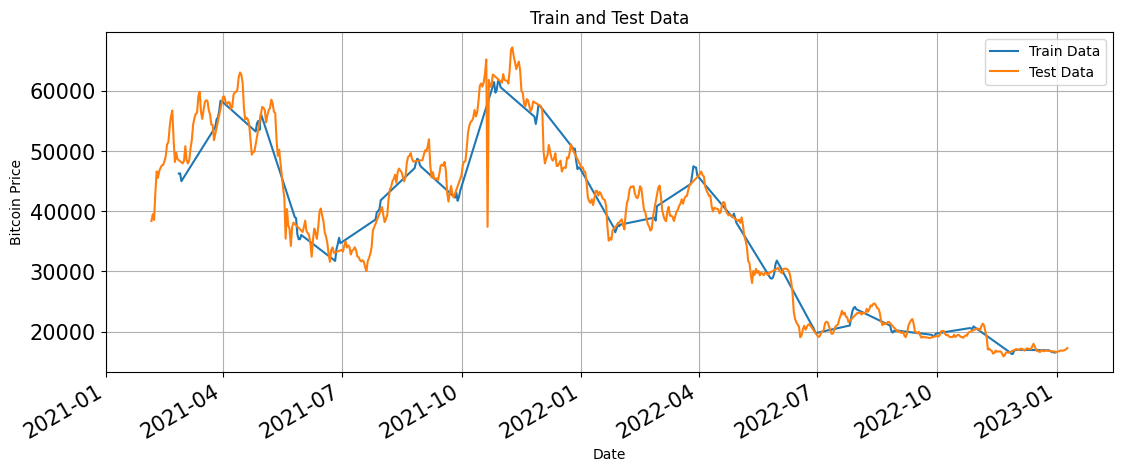

In [ ]:
# Plot train and test data
train['average'].plot(figsize=(13,5), fontsize=15)
test['average'].plot(figsize=(13,5), fontsize=15)
plt.grid()
plt.legend(['Train Data', 'Test Data'])
plt.title('Train and Test Data')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.show()


In [ ]:
# Create time series for train and test data
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
print(f"Train time series length: {len(train_time)}")
print(f"Test time series length: {len(test_time)}")

# Add time series as a feature to train and test data
LR_train = train.copy()
LR_test = test.copy()
LR_train['time'] = train_time
LR_test['time'] = test_time

Train time series length: 124
Test time series length: 580


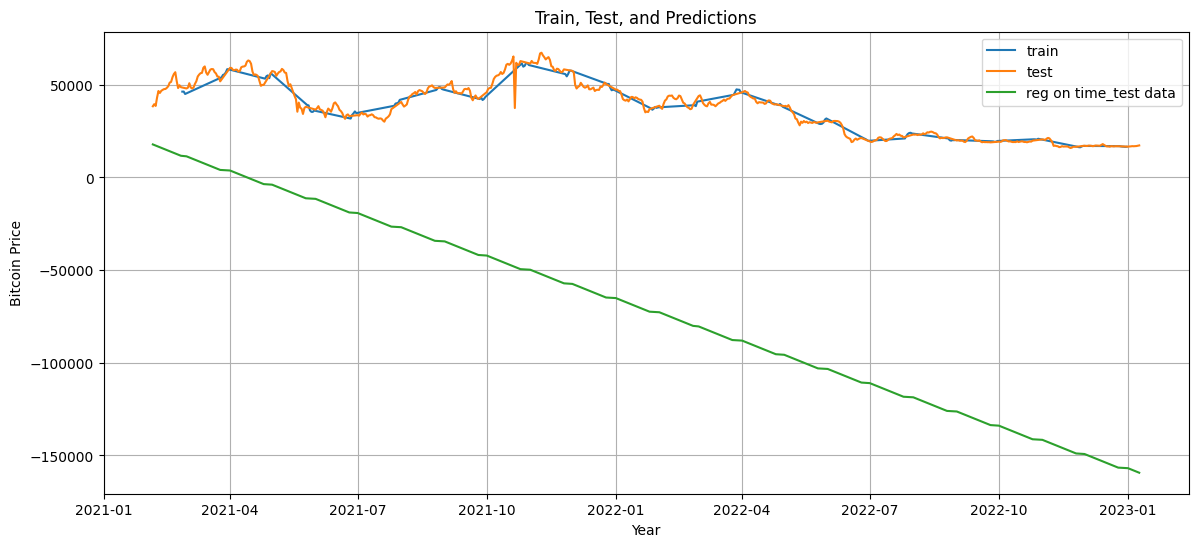

In [ ]:
# Train a linear regression model on the train data using time as the independent variable
lr = LinearRegression()
lr.fit(LR_train[['time']], LR_train['average'].values)

# Use the trained model to make predictions on the test data
test_predictions_model1 = lr.predict(LR_test[['time']])
LR_test['forecast'] = test_predictions_model1

# Plot the train data, test data, and predictions made by the linear regression model
plt.figure(figsize=(14,6))
plt.plot(train['average'], label='train')
plt.plot(test['average'], label='test')
plt.plot(LR_test['forecast'], label='reg on time_test data')
plt.legend(loc='best')
plt.grid()
plt.title('Train, Test, and Predictions')
plt.xlabel('Year')
plt.ylabel('Bitcoin Price')
plt.show()

In [ ]:
def mape(y_true, y_pred):
    """Calculate mean absolute percentage error (MAPE)"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE for the linear regression model
mape_model1_test = mape(test['average'].values, test_predictions_model1)
print(f"MAPE for Regression on Time model on test data: {mape_model1_test:.3f}%")

MAPE for Regression on Time model on test data: 383.072%


In [ ]:
# Create results dataframe to store MAPE values for different models
results = pd.DataFrame({'Test MAPE (%)': [mape_model1_test]}, index=['Regression on Time'])
results

,Test MAPE (%)
Regression on Time,383.072282


In [ ]:
# Create naive model
naive_train = train.copy()
naive_test = test.copy()
naive_test['naive'] = np.asarray(train['average']) [len(np.asarray(train['average'])) - 1]
naive_test['naive'].head()

daily
2021-02-05    16549.595
2021-02-06    16549.595
2021-02-07    16549.595
2021-02-08    16549.595
2021-02-09    16549.595
Name: naive, dtype: float64

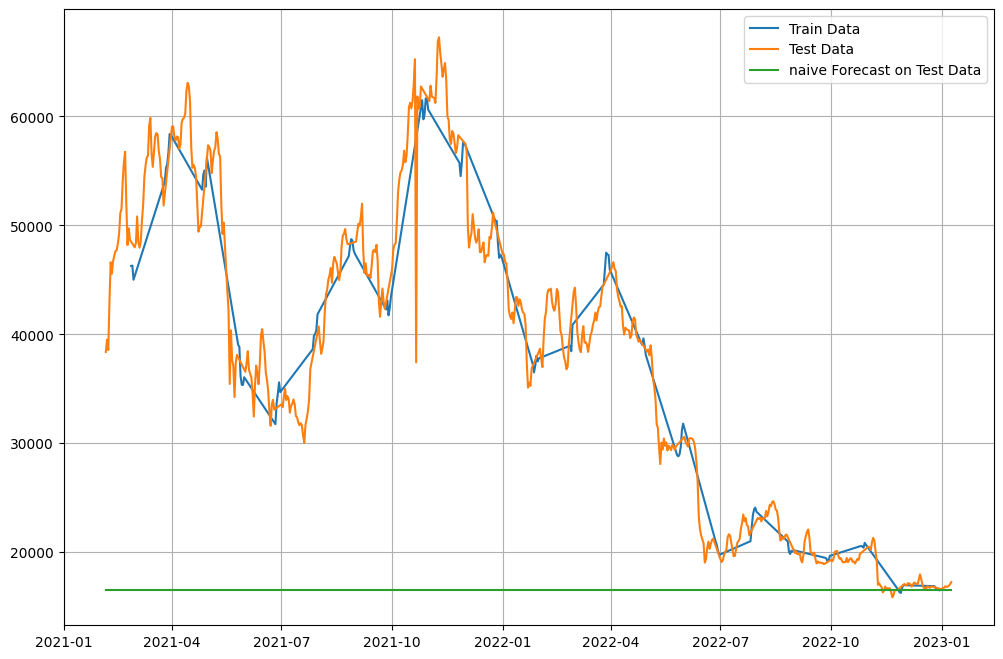

In [ ]:
# Plot the train, test, and naive forecast on test data
plt.figure(figsize=(12,8))
plt.plot(naive_train['average'], label='Train Data')
plt.plot(test['average'], label='Test Data')
plt.plot(naive_test['naive'], label='naive Forecast on Test Data')
plt.legend(loc='best')
plt.grid()

In [ ]:
# Calculate MAPE for naive forecast model
mape_model2_test = mape(test['average'].values, naive_test['naive'].values)
print('MAPE for naive Forecast model is %3.3f%%' % mape_model2_test)

# Update the dataframe with the MAPE result for the naive forecast model
resultsDf_2 = pd.DataFrame({'Test MAPE (%)': [mape_model2_test]}, index=['naiveForecast'])
results = pd.concat([results,resultsDf_2])

# Display the dataframe with the MAPE results for both models
results

MAPE for naive Forecast model is 47.869%


,Test MAPE (%)
Regression on Time,383.072282
naiveForecast,47.869007


In [ ]:
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
df['average'] = pd.to_numeric(df['average'], errors='coerce')

avgArray = np.asarray(df['average'])

# seasonal periods of 7 bc there's 7 days
seasonal_periods = 7

# Perform exponential smoothing w/ additive trend & additive seasonality
avgPriceModel = ExponentialSmoothing(avgArray, trend='additive', seasonal='additive', seasonal_periods=seasonal_periods).fit(
    smoothing_level=0.5, smoothing_trend=0.5, smoothing_seasonal=0.01)

# Calculate mean absolute percentage error (MAPE) of fitted values
avgPriceModelFinal = mape(avgArray, avgPriceModel.fittedvalues)
print('MAPE of final model: %.3f%%' % avgPriceModelFinal)


MAPE of final model: 3.162%


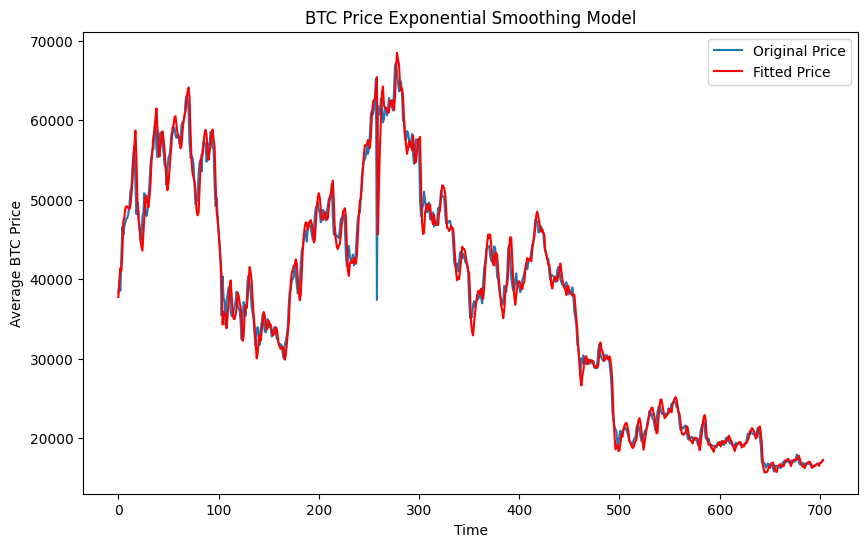

In [ ]:
import matplotlib.pyplot as plt

#plotting original data
plt.figure(figsize=(10, 6))
plt.plot(avgArray, label='Original Price')

#ploting fitted values
plt.plot(avgPriceModel.fittedvalues, label='Fitted Price', color='red')

plt.title('BTC Price Exponential Smoothing Model')
plt.xlabel('Time')
plt.ylabel('Average BTC Price')
plt.legend()
plt.show()


In [ ]:
# Generate forecast using the final model
prediction = avgPriceModel.forecast(steps=len(test))

# Create a dataframe to store the prediction and confidence intervals
pred_df = pd.DataFrame({
    'lower_CI': prediction - 1.96 * np.std(avgPriceModel.resid, ddof=1),
    'prediction': prediction,
    'upper_CI': prediction + 1.96 * np.std(avgPriceModel.resid, ddof=1)
})
pred_df.to_csv('BitcoinPricePredictions.csv', index=True, index_label='Month')

print('Prediction and confidence intervals:')
pred_df

Prediction and confidence intervals:


,lower_CI,prediction,upper_CI
0,13439.896637,17412.764848,21385.633060
1,13534.925123,17507.793335,21480.661546
2,13296.579953,17269.448164,21242.316376
3,13478.492908,17451.361119,21424.229330
4,13559.274388,17532.142600,21505.010811
...,...,...,...
575,62217.524657,66190.392869,70163.261080
576,61979.179487,65952.047699,69924.915910
577,62161.092442,66133.960653,70106.828864
578,62241.873923,66214.742134,70187.610345


## Sentiment Model

In [491]:
sentimentDF = pd.read_csv('updatedAverageSentiment.csv')

In [492]:
sentimentDF

,index,tweetDate,compoundScore,count,negativeScore,positiveScore,neutralScore
0,0,2021-02-05,0.103567,772,0.030500,0.071929,0.897578
1,1,2021-02-06,0.110918,1488,0.026290,0.071880,0.901828
2,2,2021-02-07,0.115992,1169,0.024441,0.071811,0.903743
3,3,2021-02-08,0.138868,3180,0.023406,0.081950,0.894644
4,4,2021-02-09,0.119698,2102,0.025271,0.073755,0.900970
...,...,...,...,...,...,...,...
216,216,2022-12-27,0.175156,13640,0.026069,0.078869,0.895062
217,217,2023-01-06,0.206539,3165,0.022792,0.080418,0.896790
218,218,2023-01-07,0.155540,15662,0.029332,0.076448,0.894221
219,219,2023-01-08,0.158096,3085,0.023812,0.065601,0.910587


In [493]:
sentimentDF['compoundScore'] = pd.to_numeric(sentimentDF['compoundScore'], errors='coerce')

# Seasonal periods of 7 because there are 7 days
seasonal_periods = 7

compoundscoreArray = np.asarray(sentimentDF['compoundScore'])

# Fitting Exponential Smoothing model
final_model_1 = ExponentialSmoothing(compoundscoreArray, trend='additive', seasonal='additive', seasonal_periods=seasonal_periods).fit(
    smoothing_level=0.1, smoothing_trend=0.2, smoothing_seasonal=0.1)

# Calculate mean absolute percentage error (MAPE) of fitted values
mape_final_model = mape(compoundscoreArray, final_model_1.fittedvalues)
print('MAPE of final model: %.3f%%' % mape_final_model)

MAPE of final model: 16.571%


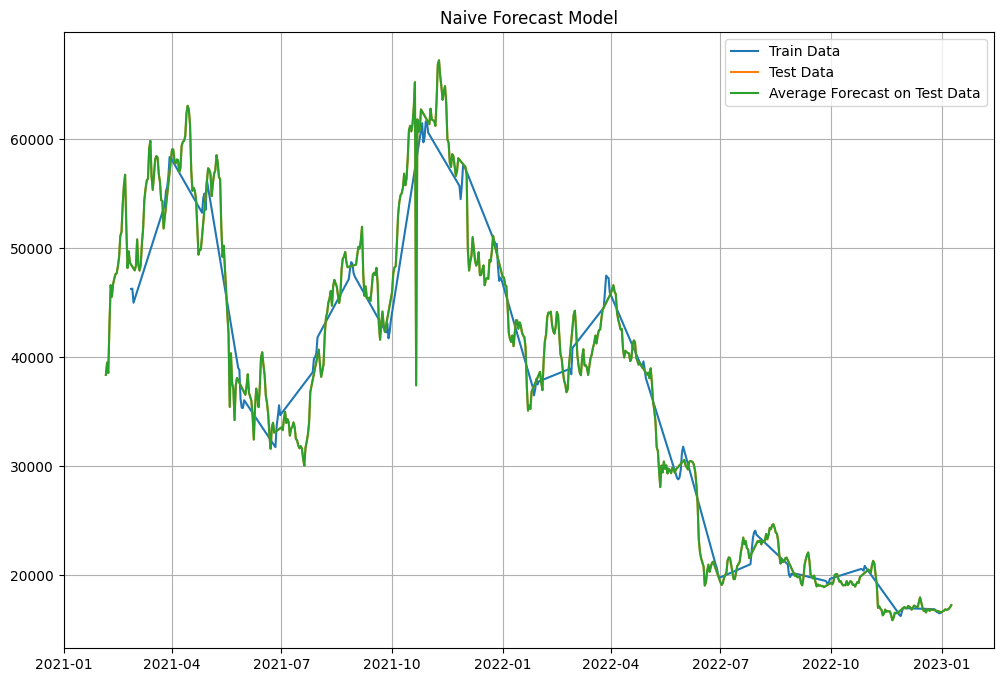

In [494]:
naive_train = train.copy()
naive_test = test.copy()
naive_test['naive'] = np.asarray(train['average']) [len(np.asarray(train['average'])) - 1]
naive_test['naive'].head()

# Plot the train, test, and naive forecast on test data
plt.figure(figsize=(12,8))
plt.plot(naive_train['average'], label='Train Data')
plt.plot(test['average'], label='Test Data')
plt.plot(naive_test['average'], label='Average Forecast on Test Data')
plt.legend(loc='best')
plt.title('Naive Forecast Model')
plt.grid()

In [495]:
# Calculate MAPE for naive forecast model
mape_model2_test = mape(test['average'].values, naive_test['naive'].values)
print('MAPE for naive Forecast model is %3.3f%%' % mape_model2_test)

# Update the dataframe with the MAPE result for the naive forecast model
resultsDf_2 = pd.DataFrame({'Test MAPE (%)': [mape_model2_test]}, index=['naiveForecast'])
results = pd.concat([results,resultsDf_2])

# Display the dataframe with the MAPE results for both models
results

MAPE for naive Forecast model is 47.869%


,Test MAPE (%)
Regression on Time,383.072282
naiveForecast,47.869007
naiveForecast,47.869007
naiveForecast,47.869007


Exponential Smoothing works by:
* recursively updating  a set of weighted averages to estimate the level and trend in the data.
* incorporated seasonal pattern of 7 days
* Used ExponentialSmoothing class, specifying parameters for trend and seasonality (trend='additive', seasonal='additive') and fit the model to sentiment data.

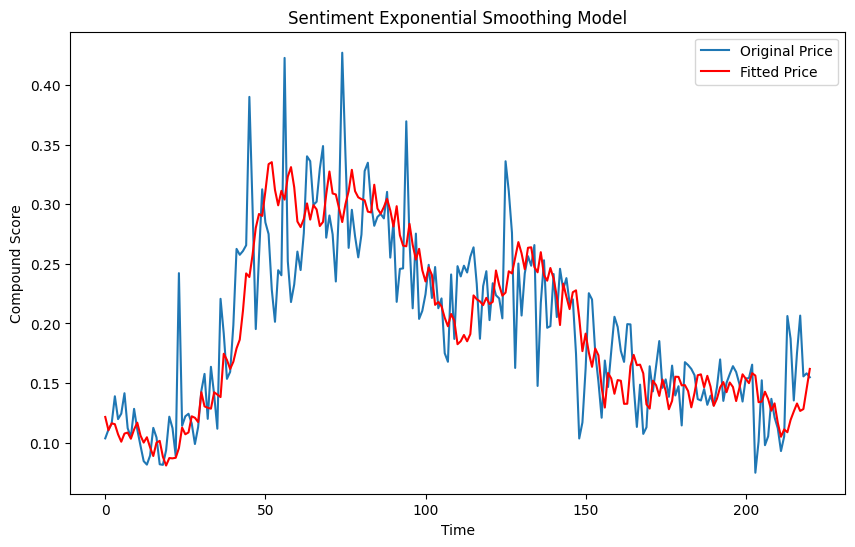

In [496]:
import matplotlib.pyplot as plt

#plotting original data
plt.figure(figsize=(10, 6))
plt.plot(compoundscoreArray, label='Original Price')

#ploting fitted values
plt.plot(final_model_1.fittedvalues, label='Fitted Price', color='red')

plt.title('Sentiment Exponential Smoothing Model')
plt.xlabel('Time')
plt.ylabel('Compound Score')
plt.legend()
plt.show()


## Multivariate

In [497]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, LSTM, GRU

from sklearn.preprocessing import StandardScaler

In [498]:
df = pd.read_csv('bitcoin.csv')


In [499]:
df

,cryptoName,date,open,close,high,low,average,volume,trade_count,vwap,timestamp
0,BTC/USD,02/05/2021,37102.75,39051.00,39699.95,37070.01,38384.980,1153.670297,55838.0,38439.087793,2021-02-05 06:00:00+00:00
1,BTC/USD,02/06/2021,39054.20,38571.85,41019.93,38000.00,39509.965,1238.672877,63997.0,39759.608536,2021-02-06 06:00:00+00:00
2,BTC/USD,02/07/2021,38565.36,38700.00,39736.17,37383.51,38559.840,932.225474,46244.0,38455.814609,2021-02-07 06:00:00+00:00
3,BTC/USD,02/08/2021,38712.80,46964.37,47500.00,38658.96,43079.480,2876.161989,91292.0,44010.764310,2021-02-08 06:00:00+00:00
4,BTC/USD,02/09/2021,46957.60,46166.35,48203.13,45040.00,46621.565,1420.610386,59671.0,46688.885698,2021-02-09 06:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...
699,BTC/USD,01/05/2023,16838.47,16803.47,16873.28,16755.45,16814.365,2580.410943,57481.0,16822.708137,2023-01-05 06:00:00+00:00
700,BTC/USD,01/06/2023,16803.36,16926.62,17022.87,16675.00,16848.935,4927.378570,68356.0,16847.149630,2023-01-06 06:00:00+00:00
701,BTC/USD,01/07/2023,16926.60,16936.00,16949.00,16900.90,16924.950,1044.522620,20189.0,16925.486121,2023-01-07 06:00:00+00:00
702,BTC/USD,01/08/2023,16935.27,17196.67,17248.53,16910.00,17079.265,4781.203400,60226.0,17095.069656,2023-01-08 06:00:00+00:00


In [500]:
sentimentDF

,index,tweetDate,compoundScore,count,negativeScore,positiveScore,neutralScore
0,0,2021-02-05,0.103567,772,0.030500,0.071929,0.897578
1,1,2021-02-06,0.110918,1488,0.026290,0.071880,0.901828
2,2,2021-02-07,0.115992,1169,0.024441,0.071811,0.903743
3,3,2021-02-08,0.138868,3180,0.023406,0.081950,0.894644
4,4,2021-02-09,0.119698,2102,0.025271,0.073755,0.900970
...,...,...,...,...,...,...,...
216,216,2022-12-27,0.175156,13640,0.026069,0.078869,0.895062
217,217,2023-01-06,0.206539,3165,0.022792,0.080418,0.896790
218,218,2023-01-07,0.155540,15662,0.029332,0.076448,0.894221
219,219,2023-01-08,0.158096,3085,0.023812,0.065601,0.910587


In [501]:
sentimentDF['tweetDate'] = pd.to_datetime(sentimentDF['tweetDate']).dt.date
df['date'] = pd.to_datetime(df['date']).dt.date

mergedDF = pd.merge(df, sentimentDF, left_on='date', right_on='tweetDate', how='inner')

mergedDF.drop(columns=['tweetDate'], inplace=True)

print(mergedDF)


    cryptoName        date      open     close      high       low    average  \
0      BTC/USD  2021-02-05  37102.75  39051.00  39699.95  37070.01  38384.980   
1      BTC/USD  2021-02-06  39054.20  38571.85  41019.93  38000.00  39509.965   
2      BTC/USD  2021-02-07  38565.36  38700.00  39736.17  37383.51  38559.840   
3      BTC/USD  2021-02-08  38712.80  46964.37  47500.00  38658.96  43079.480   
4      BTC/USD  2021-02-09  46957.60  46166.35  48203.13  45040.00  46621.565   
..         ...         ...       ...       ...       ...       ...        ...   
216    BTC/USD  2022-12-27  16872.72  16599.15  16890.00  16562.85  16726.425   
217    BTC/USD  2023-01-06  16803.36  16926.62  17022.87  16675.00  16848.935   
218    BTC/USD  2023-01-07  16926.60  16936.00  16949.00  16900.90  16924.950   
219    BTC/USD  2023-01-08  16935.27  17196.67  17248.53  16910.00  17079.265   
220    BTC/USD  2023-01-09  17198.94  17221.37  17387.05  17126.73  17256.890   

          volume  trade_cou

In [502]:
mergedDF

,cryptoName,date,open,close,high,low,average,volume,trade_count,vwap,timestamp,index,compoundScore,count,negativeScore,positiveScore,neutralScore
0,BTC/USD,2021-02-05,37102.75,39051.00,39699.95,37070.01,38384.980,1153.670297,55838.0,38439.087793,2021-02-05 06:00:00+00:00,0,0.103567,772,0.030500,0.071929,0.897578
1,BTC/USD,2021-02-06,39054.20,38571.85,41019.93,38000.00,39509.965,1238.672877,63997.0,39759.608536,2021-02-06 06:00:00+00:00,1,0.110918,1488,0.026290,0.071880,0.901828
2,BTC/USD,2021-02-07,38565.36,38700.00,39736.17,37383.51,38559.840,932.225474,46244.0,38455.814609,2021-02-07 06:00:00+00:00,2,0.115992,1169,0.024441,0.071811,0.903743
3,BTC/USD,2021-02-08,38712.80,46964.37,47500.00,38658.96,43079.480,2876.161989,91292.0,44010.764310,2021-02-08 06:00:00+00:00,3,0.138868,3180,0.023406,0.081950,0.894644
4,BTC/USD,2021-02-09,46957.60,46166.35,48203.13,45040.00,46621.565,1420.610386,59671.0,46688.885698,2021-02-09 06:00:00+00:00,4,0.119698,2102,0.025271,0.073755,0.900970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,BTC/USD,2022-12-27,16872.72,16599.15,16890.00,16562.85,16726.425,4078.846778,70487.0,16722.269632,2022-12-27 06:00:00+00:00,216,0.175156,13640,0.026069,0.078869,0.895062
217,BTC/USD,2023-01-06,16803.36,16926.62,17022.87,16675.00,16848.935,4927.378570,68356.0,16847.149630,2023-01-06 06:00:00+00:00,217,0.206539,3165,0.022792,0.080418,0.896790
218,BTC/USD,2023-01-07,16926.60,16936.00,16949.00,16900.90,16924.950,1044.522620,20189.0,16925.486121,2023-01-07 06:00:00+00:00,218,0.155540,15662,0.029332,0.076448,0.894221
219,BTC/USD,2023-01-08,16935.27,17196.67,17248.53,16910.00,17079.265,4781.203400,60226.0,17095.069656,2023-01-08 06:00:00+00:00,219,0.158096,3085,0.023812,0.065601,0.910587


In [503]:
df = mergedDF

In [504]:
df.columns

Index(['cryptoName', 'date', 'open', 'close', 'high', 'low', 'average',
       'volume', 'trade_count', 'vwap', 'timestamp', 'index', 'compoundScore',
       'count', 'negativeScore', 'positiveScore', 'neutralScore'],
      dtype='object')

In [505]:
(df['compoundScore'][0].min())

0.1035665803108808

In [506]:
type(df['timestamp'][0])

str

In [507]:
df.columns[:2]

Index(['cryptoName', 'date'], dtype='object')

In [508]:
df.columns[3:10]

Index(['close', 'high', 'low', 'average', 'volume', 'trade_count', 'vwap'], dtype='object')

In [509]:
df.columns[12:]

Index(['compoundScore', 'count', 'negativeScore', 'positiveScore',
       'neutralScore'],
      dtype='object')

In [510]:
df

,cryptoName,date,open,close,high,low,average,volume,trade_count,vwap,timestamp,index,compoundScore,count,negativeScore,positiveScore,neutralScore
0,BTC/USD,2021-02-05,37102.75,39051.00,39699.95,37070.01,38384.980,1153.670297,55838.0,38439.087793,2021-02-05 06:00:00+00:00,0,0.103567,772,0.030500,0.071929,0.897578
1,BTC/USD,2021-02-06,39054.20,38571.85,41019.93,38000.00,39509.965,1238.672877,63997.0,39759.608536,2021-02-06 06:00:00+00:00,1,0.110918,1488,0.026290,0.071880,0.901828
2,BTC/USD,2021-02-07,38565.36,38700.00,39736.17,37383.51,38559.840,932.225474,46244.0,38455.814609,2021-02-07 06:00:00+00:00,2,0.115992,1169,0.024441,0.071811,0.903743
3,BTC/USD,2021-02-08,38712.80,46964.37,47500.00,38658.96,43079.480,2876.161989,91292.0,44010.764310,2021-02-08 06:00:00+00:00,3,0.138868,3180,0.023406,0.081950,0.894644
4,BTC/USD,2021-02-09,46957.60,46166.35,48203.13,45040.00,46621.565,1420.610386,59671.0,46688.885698,2021-02-09 06:00:00+00:00,4,0.119698,2102,0.025271,0.073755,0.900970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,BTC/USD,2022-12-27,16872.72,16599.15,16890.00,16562.85,16726.425,4078.846778,70487.0,16722.269632,2022-12-27 06:00:00+00:00,216,0.175156,13640,0.026069,0.078869,0.895062
217,BTC/USD,2023-01-06,16803.36,16926.62,17022.87,16675.00,16848.935,4927.378570,68356.0,16847.149630,2023-01-06 06:00:00+00:00,217,0.206539,3165,0.022792,0.080418,0.896790
218,BTC/USD,2023-01-07,16926.60,16936.00,16949.00,16900.90,16924.950,1044.522620,20189.0,16925.486121,2023-01-07 06:00:00+00:00,218,0.155540,15662,0.029332,0.076448,0.894221
219,BTC/USD,2023-01-08,16935.27,17196.67,17248.53,16910.00,17079.265,4781.203400,60226.0,17095.069656,2023-01-08 06:00:00+00:00,219,0.158096,3085,0.023812,0.065601,0.910587


In [511]:
list(df.columns[3:10]) + list(df.columns[12:16])

['close',
 'high',
 'low',
 'average',
 'volume',
 'trade_count',
 'vwap',
 'compoundScore',
 'count',
 'negativeScore',
 'positiveScore']

In [512]:
all = ['close',
 'high',
 'low',
 'average',
 'volume',
 'trade_count',
 'vwap',
 'compoundScore',
 'count',
 'negativeScore',
 'positiveScore',
 'neutralScore',
]


GRU Model on All Features

In [534]:
# convert the Date column to DateTime from Object type
train_set_dates = pd.to_datetime(df['timestamp'])
train_set_dates.head()

# extract the required features (in this we are omiting the volume from feature list)
# variables = list(df.columns[1:9])
# variables = ['open', 'close', 'high', 'low', 'average', 'volume',
#        'trade_count', 'vwap',
#        'compoundScore', 'count', 'negativeScore', 'positiveScore',
#        'neutralScore']

variables = list(df.columns[3:10]) + list(df.columns[12:17])
print(variables)

dfTrain = df[variables].astype(float)
dfTrain.head()

# normalize data
standardScaler = StandardScaler()
scalar = standardScaler.fit(dfTrain)
scaled_training_df = scalar.transform(dfTrain)

['close', 'high', 'low', 'average', 'volume', 'trade_count', 'vwap', 'compoundScore', 'count', 'negativeScore', 'positiveScore', 'neutralScore']


In [535]:
trainX = []
trainY = []

daysPredictFututre = 3 # num days to predict future
pastDays = 20 # num days prediction is based off

for i in range(pastDays, len(scaled_training_df) - daysPredictFututre+1):
    trainX.append(scaled_training_df[i - pastDays:i, 0:dfTrain.shape[1]])
    trainY.append(scaled_training_df[i + daysPredictFututre - 1:i + daysPredictFututre, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape: {}'.format(trainX.shape))
print('trainY shape: {}'.format(trainY.shape))

trainX shape: (199, 20, 12)
trainY shape: (199, 1)


In [536]:
model = Sequential()
model.add(GRU(128, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
# model.add(GRU(64, activation='relu', return_sequences=True))
model.add(GRU(64, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_73 (GRU)                (None, 20, 128)           54528     
                                                                 
 gru_74 (GRU)                (None, 64)                37248     
                                                                 
 dropout_36 (Dropout)        (None, 64)                0         
                                                                 
 dense_36 (Dense)            (None, 1)                 65        
                                                                 
Total params: 91841 (358.75 KB)
Trainable params: 91841 (358.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/4
4/4 [==============================] - 5s 231ms/step - loss: 0.6755 - val_loss: 0.0346
Epoch 2/4
4/4 [==============================] - 0s 60ms/step - loss: 0.2763 - val_loss: 0.2902
Epoch 3/4
4/4 [==============================] - 0s 55ms/step - loss: 0.1735 - val_loss: 0.0750
Epoch 4/4
4/4 [==============================] - 0s 55ms/step - loss: 0.1447 - val_loss: 0.0145


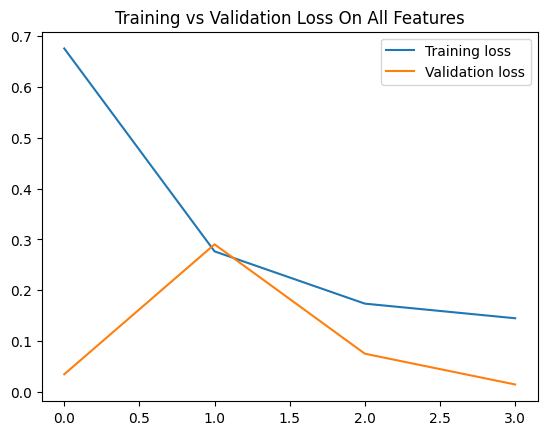

In [537]:
# fitting model
history = model.fit(trainX, trainY, epochs=4, batch_size=50, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title("Training vs Validation Loss On All Features")
plt.legend()

In [538]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

scalar = StandardScaler()
scalar.fit(dfTrain.iloc[:, :1])
predictions = model.predict(trainX)
predictions = predictions.reshape(-1, 1)

# inverse transform predictions & actual values
predictionValus = scalar.inverse_transform(predictions)
actual = scalar.inverse_transform(trainY)

# get RMSE
rmse = np.sqrt(mean_squared_error(actual, predictionValus))
print("RMSE:", rmse)


7/7 [==============================] - 0s 13ms/step
RMSE: 4457.894628052584


In [539]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

pastDaysTesting = 150
daysPredicting=180

predict_period_dates = pd.date_range(list(train_set_dates)[-pastDaysTesting], periods=daysPredicting, freq=us_bd).tolist()

prediction = model.predict(trainX[-daysPredicting:]) #shape = (n, 1) where n is the n_days_for_prediction

# predict future price
predictionCopies = np.repeat(prediction, dfTrain.shape[1], axis=-1)
futurePricePrediction = scalar.inverse_transform(predictionCopies)[:,0]

forecastDates = []
for time in predict_period_dates:
    forecastDates.append(time.date())

dfFOrecasitng = pd.DataFrame({'timestamp':np.array(forecastDates), 'open':futurePricePrediction})
dfFOrecasitng['timestamp']=pd.to_datetime(dfFOrecasitng['timestamp'])

original = df[['timestamp', 'open']]
original['timestamp']=pd.to_datetime(original['timestamp'])
original = original.loc[original['timestamp'] >= '2021-02-05']

6/6 [==============================] - 0s 13ms/step


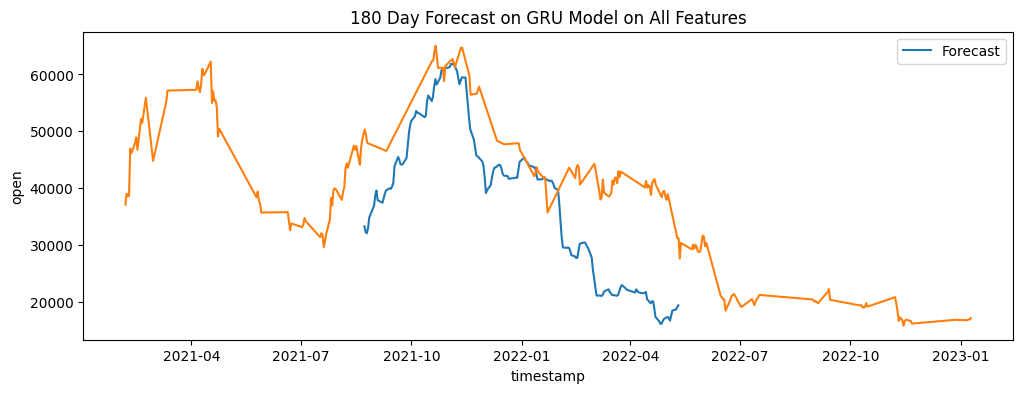

In [540]:
plt.figure(figsize=(12,4))
sns.lineplot(data=dfFOrecasitng, x='timestamp', y='open', )
sns.lineplot(data=original, x='timestamp', y='open', label = 'Actual Price')
plt.title('180 Day Forecast on GRU Model on All Features')
plt.legend(['Forecast'])
plt.show()

##GRU Model on Compound Sentiment and Average Price

In [541]:
variables = list(df.columns[6:7]) + list(df.columns[12:13])
variables

['average', 'compoundScore']

In [542]:
# convert the Date column to DateTime from Object type
train_set_dates = pd.to_datetime(df['timestamp'])
train_set_dates.head()

# extract the required features (in this we are omiting the volume from feature list)
# variables = list(df.columns[1:9])
# variables = ['open', 'close', 'high', 'low', 'average', 'volume',
#        'trade_count', 'vwap',
#        'compoundScore', 'count', 'negativeScore', 'positiveScore',
#        'neutralScore']

variables = list(df.columns[6:7]) + list(df.columns[12:13])
print(variables)

dfTrain = df[variables].astype(float)
dfTrain.head()

# normalize data
standardScaler = StandardScaler()
scalar = standardScaler.fit(dfTrain)
scaled_training_df = scalar.transform(dfTrain)

['average', 'compoundScore']


In [543]:
trainX = []
trainY = []

daysPredictFututre = 3 # num days to predict future
pastDays = 20 # num days prediction is based off

for i in range(pastDays, len(scaled_training_df) - daysPredictFututre+1):
    trainX.append(scaled_training_df[i - pastDays:i, 0:dfTrain.shape[1]])
    trainY.append(scaled_training_df[i + daysPredictFututre - 1:i + daysPredictFututre, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape: {}'.format(trainX.shape))
print('trainY shape: {}'.format(trainY.shape))

trainX shape: (199, 20, 2)
trainY shape: (199, 1)


In [544]:
model = Sequential()
model.add(GRU(128, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
# model.add(GRU(64, activation='relu', return_sequences=True))
model.add(GRU(64, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_75 (GRU)                (None, 20, 128)           50688     
                                                                 
 gru_76 (GRU)                (None, 64)                37248     
                                                                 
 dropout_37 (Dropout)        (None, 64)                0         
                                                                 
 dense_37 (Dense)            (None, 1)                 65        
                                                                 
Total params: 88001 (343.75 KB)
Trainable params: 88001 (343.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/5
4/4 [==============================] - 5s 318ms/step - loss: 0.7431 - val_loss: 1.7282
Epoch 2/5
4/4 [==============================] - 0s 99ms/step - loss: 0.5623 - val_loss: 1.3207
Epoch 3/5
4/4 [==============================] - 0s 109ms/step - loss: 0.3897 - val_loss: 0.8161
Epoch 4/5
4/4 [==============================] - 1s 157ms/step - loss: 0.2594 - val_loss: 0.2537
Epoch 5/5
4/4 [==============================] - 0s 108ms/step - loss: 0.1559 - val_loss: 0.0557


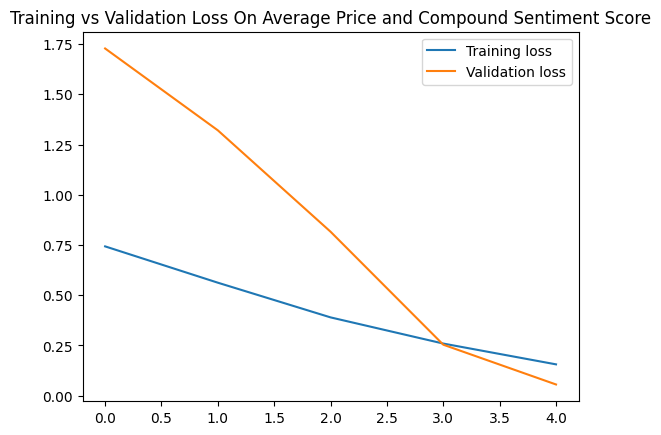

In [545]:
# fitting model
history = model.fit(trainX, trainY, epochs=5, batch_size=50, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title("Training vs Validation Loss On Average Price and Compound Sentiment Score")
plt.legend()

In [546]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

scalar = StandardScaler()
scalar.fit(dfTrain.iloc[:, :1])
predictions = model.predict(trainX)
predictions = predictions.reshape(-1, 1)

# inverse transform predictions & actual values
predictionValus = scalar.inverse_transform(predictions)
actual = scalar.inverse_transform(trainY)

# get RMSE
rmse = np.sqrt(mean_squared_error(actual, predictionValus))
print("RMSE:", rmse)


7/7 [==============================] - 1s 13ms/step
RMSE: 4510.615801105004


In [547]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

pastDaysTesting = 150
daysPredicting=180

predict_period_dates = pd.date_range(list(train_set_dates)[-pastDaysTesting], periods=daysPredicting, freq=us_bd).tolist()

prediction = model.predict(trainX[-daysPredicting:]) #shape = (n, 1) where n is the n_days_for_prediction

# predict future price
predictionCopies = np.repeat(prediction, dfTrain.shape[1], axis=-1)
futurePricePrediction = scalar.inverse_transform(predictionCopies)[:,0]

forecastDates = []
for time in predict_period_dates:
    forecastDates.append(time.date())

dfFOrecasitng = pd.DataFrame({'timestamp':np.array(forecastDates), 'open':futurePricePrediction})
dfFOrecasitng['timestamp']=pd.to_datetime(dfFOrecasitng['timestamp'])

original = df[['timestamp', 'open']]
original['timestamp']=pd.to_datetime(original['timestamp'])
original = original.loc[original['timestamp'] >= '2021-02-05']

6/6 [==============================] - 0s 14ms/step


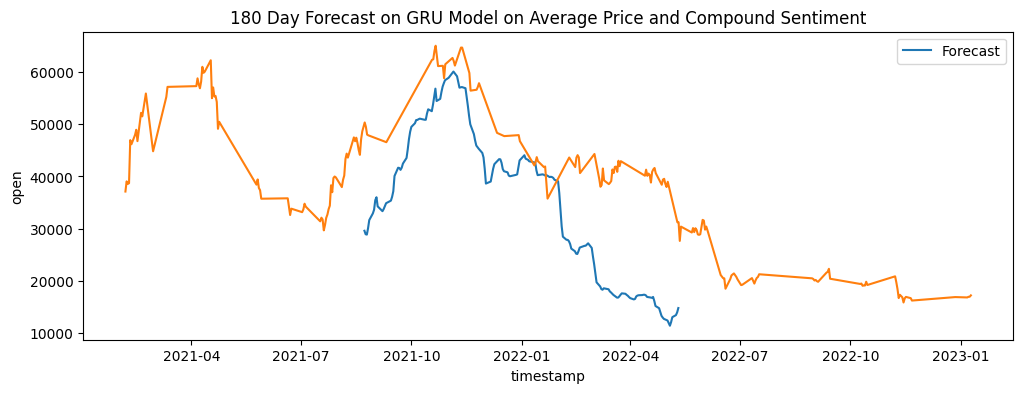

In [549]:
plt.figure(figsize=(12,4))
sns.lineplot(data=dfFOrecasitng, x='timestamp', y='open', )
sns.lineplot(data=original, x='timestamp', y='open', label = 'Actual Price')
plt.title('180 Day Forecast on GRU Model on Average Price and Compound Sentiment')
plt.legend(['Forecast'])
plt.show()